In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
# Data set generation
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1) 

# y = .8 x^2 + .9x + 2

In [7]:
X.shape

(200, 1)

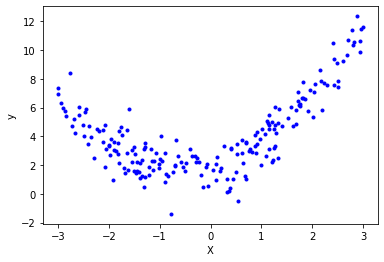

In [9]:
# plot
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel('y')
plt.show()

In [10]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =2)

In [11]:
# applying Linear Regression
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

In [14]:
# r2 score
print(r2_score(y_test,y_pred))

0.18572769925206145


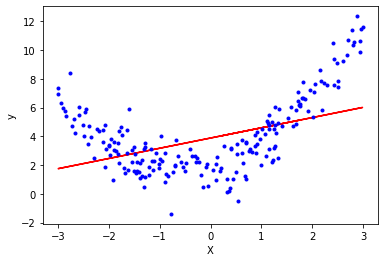

In [15]:
# plot of LR
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel('y')
plt.show()

In [27]:
print(lr.coef_)

[[0.82535521 0.79941083]]


In [28]:
print(lr.intercept_)

[1.86918526]


### Polynomial LR

In [21]:
# degree =2
poly = PolynomialFeatures(degree=2, include_bias = False)  # include_bias is about intercept c

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [22]:
print(X_train[0])
print(X_train_trans[0])

[1.76022614]
[1.76022614 3.09839607]


In [23]:
# applying Linear Regression
lr = LinearRegression()

In [24]:
lr.fit(X_train_trans, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test_trans)

In [26]:
# r2 score
print(r2_score(y_test,y_pred))

0.8797613899270704


In [29]:
print(lr.coef_)

[[0.82535521 0.79941083]]


In [30]:
print(lr.intercept_)

[1.86918526]


In [31]:
# plot
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

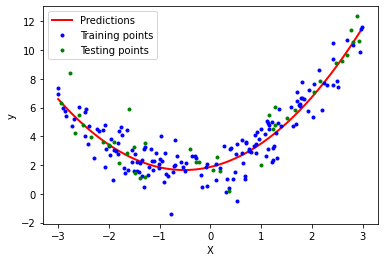

In [32]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()